In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow 
import statistics
from tensorflow.keras.models import Sequential
from tensorflow.keras.metrics import mean_squared_error, MeanSquaredError
from tensorflow.keras.layers import Dense, Input, Conv2D, Flatten, Dropout
from keras import callbacks

from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip '/content/drive/My Drive/soybean_images.zip'

In [4]:
sample_dir = '/content/soybean_images/'

images = []
labels = []
for f in os.listdir(sample_dir):
  sample = np.load(sample_dir + str(f))

  images.append(sample['image'])
  labels.append(sample['y'])

In [5]:
print(np.asarray(images).shape)
print(np.asarray(labels).shape)

(22986, 9, 32, 32)
(22986,)


### Output:

Numpy array containing the 22986 image samples.

**Images:** [num_samples, channels, x_dim, y_dim]

**Labels:** [num_samples,]


In [6]:
X = np.asarray(images)
y = labels

In [7]:
max_y = max(y)
min_y = min(y) 
print(max_y)
print(min_y)

82.3
0.7


In [8]:
print(X.shape)
print(X[0].shape)

(22986, 9, 32, 32)
(9, 32, 32)


In [9]:
scaler = MinMaxScaler()
for sample in X:
  for channel in sample:
    A = channel.reshape([-1,1])
    B = scaler.fit_transform(A)
    channel = B.reshape(X.shape[2],X.shape[3])

## **Train-Test-Validation Data Split**

In [10]:
def split_data(X,y):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 0)
    
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    X_val = np.asarray(X_val)
    y_train = np.asarray(y_train)
    y_val = np.asarray(y_val)
    y_test = np.asarray(y_test)

    return X_train, y_train, X_val, y_val, X_test, y_test

## **Baseline Model Architectures in Keras**

In [ ]:
def model(X,y,type):

  if type == 'MLP':

      # convert 2D arrays into 1D arrays
      X = X.flatten().reshape(X.shape[0],X.shape[1]*X.shape[2]*X.shape[3])

      X_train, y_train, X_val, y_val, X_test, y_test  = split_data(X,y)

      # MLP a.k.a feed forward NN
      model = Sequential()
      model.add(Dense(128, input_shape=(9216,), activation='relu'))
      model.add(Dense(64, activation='relu'))
      model.add(Dense(1, kernel_initializer='normal'))

      model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
      history = model.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_val, y_val))

      # predictions
      predictions = model.predict(X_test)
        
      return history, predictions, y_test
  
  elif type == 'CNN':

      X_train, y_train, X_val, y_val, X_test, y_test = split_data(X,y)

      # CNN
      model2 = Sequential()
      model2.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(9,32,32)))
      model2.add(Conv2D(32, kernel_size=3, activation='relu'))
      model2.add(Flatten())
      model2.add(Dense(1, kernel_initializer='normal'))

      model2.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_squared_error'])
      history = model2.fit(X_train,y_train,batch_size=64,epochs=10,validation_data=(X_val, y_val))

      # predictions
      predictions = model2.predict(X_test)
        
      return history, predictions, y_test
      

## **Metrics (MSE,RMSE,MAE)**

In [11]:
def metrics(predictions, y_test):
    sum = 0
    mae_sum = 0
    for i in range(len(predictions)):
        mae_sum += abs(y_test[i] - predictions[i])
        error = y_test[i] - predictions[i]
        error = error**2
        sum += error

    mse = sum/len(predictions)
    rmse = np.sqrt(mse)
    mae = mae_sum/len(predictions)
    print("MSE: {}".format(mse))    
    print("RMSE:{}".format(rmse))
    print("MAE: {}".format(mae))
    print("NRMSE: {}".format(rmse/(max_y-min_y)))

## **Train vs Validation MSE Plot**

In [12]:
def plot_error(model):
    print(model.history.keys())
    plt.plot(model.history['mean_squared_error'])
    plt.plot(model.history['val_mean_squared_error'])
    plt.title('Model MSE')
    plt.ylabel('MSE')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## **Baseline Multi-Layer Perceptron (MLP) Model**

In [ ]:
model,predictions,y_test = model(X,y,'MLP')
print("--- MLP METRICS ---")
metrics(predictions,y_test)

Epoch 1/10
216/216 [==============================] - 4s 7ms/step - loss: 225.0743 - mean_squared_error: 225.0743 - val_loss: 65.0602 - val_mean_squared_error: 65.0602
Epoch 2/10
216/216 [==============================] - 1s 5ms/step - loss: 59.5555 - mean_squared_error: 59.5555 - val_loss: 54.7751 - val_mean_squared_error: 54.7751
Epoch 3/10
216/216 [==============================] - 1s 5ms/step - loss: 52.1037 - mean_squared_error: 52.1037 - val_loss: 50.2442 - val_mean_squared_error: 50.2442
Epoch 4/10
216/216 [==============================] - 1s 5ms/step - loss: 46.3006 - mean_squared_error: 46.3006 - val_loss: 46.3673 - val_mean_squared_error: 46.3673
Epoch 5/10
216/216 [==============================] - 1s 5ms/step - loss: 40.3218 - mean_squared_error: 40.3218 - val_loss: 40.8306 - val_mean_squared_error: 40.8306
Epoch 6/10
216/216 [==============================] - 1s 5ms/step - loss: 34.2988 - mean_squared_error: 34.2988 - val_loss: 37.0402 - val_mean_squared_error: 37.0402
Ep

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


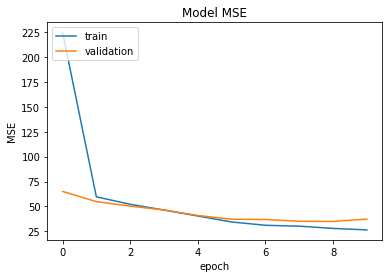

In [ ]:
plot_error(model)

## **Baseline Convolutional Neural Network (CNN) Model**

In [ ]:
cnn_model, cnn_predictions, y_test = model(X,y,'CNN')
print("--- CNN METRICS ---")
metrics(cnn_predictions,y_test)

Epoch 1/10
216/216 [==============================] - 30s 11ms/step - loss: 182.6901 - mean_squared_error: 182.6901 - val_loss: 68.3153 - val_mean_squared_error: 68.3153
Epoch 2/10
216/216 [==============================] - 2s 9ms/step - loss: 61.8110 - mean_squared_error: 61.8110 - val_loss: 54.5810 - val_mean_squared_error: 54.5810
Epoch 3/10
216/216 [==============================] - 2s 9ms/step - loss: 52.1761 - mean_squared_error: 52.1761 - val_loss: 48.3378 - val_mean_squared_error: 48.3378
Epoch 4/10
216/216 [==============================] - 2s 9ms/step - loss: 48.0104 - mean_squared_error: 48.0104 - val_loss: 47.2723 - val_mean_squared_error: 47.2723
Epoch 5/10
216/216 [==============================] - 2s 9ms/step - loss: 43.6564 - mean_squared_error: 43.6564 - val_loss: 44.9337 - val_mean_squared_error: 44.9337
Epoch 6/10
216/216 [==============================] - 2s 9ms/step - loss: 40.9558 - mean_squared_error: 40.9558 - val_loss: 45.5616 - val_mean_squared_error: 45.5616


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


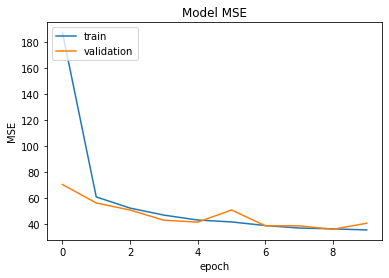

In [ ]:
plot_error(cnn_model)

# **Experimentation & Hyperparameter Tuning**

**Number of Layers**:- a very high number may introduce problems like over-fitting and vanishing and exploding gradient problems and a lower number may cause a model to have high bias. 

**Number of hidden units per layer**:-  must be chosen reasonably to find a sweet spot between high bias and variance. 

**Activation Function**:- The popular choices in this are ReLU, Sigmoid & Tanh

**Optimizer**:- It is the algorithm used by the model to update weights of every layer after every iteration. Popular choices are SGD,RMSProp and Adam. SGD works well for shallow networks but cannot escape saddle points and local minima in such cases RMSProp could be a better choice, AdaDelta/AdaGrad for sparse data whereas Adam is a general favorite and could be used to achieve faster convergence.

**Learning Rate**:- It is responsible for the core learning characteristic and must be chosen in such a way that it is not too high wherein we are unable to converge to minima and not too low such that we are unable to speed up the learning process. Recommended to try in powers of 10, specifically 0.001,0.01, 0.1,1.

**Batch Size**:- It is indicative of number of patterns shown to the network before the weight matrix is updated. If batch size is less, patterns would be less repeating and hence the weights would be all over the place and convergence would become difficult. If batch size is high learning would become slow as only after many iterations will the batch size change. It is recommend to try out batch sizes in powers of 2 (for better memory optimization) based on the data-size.

**Number of Epochs**:- The number of epochs is the number of times the entire training data is shown to the model.  High number of epochs may over-fit to the data and may have generalization problems on the test and validation set, also they could cause vanishing and exploding gradient problems. Lower number of epochs may limit the potential of the model. 

**Dropout**:- The Dropout layer  act as a regularizer to help us find the optimum bias-variance spot. It does so by removing certain connections every iteration therefore the hidden units cannot depend a lot on any particular feature. 




In [13]:
!pip install -q -U keras-tuner

In [14]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras

## **MLP Tuning**

In [17]:
def MLP(hp):

    model = Sequential()
    hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
    model.add(Dense(units=hp_units, input_shape=(9216,), activation=hp.Choice('dense_activation',values=['relu', 'tanh', 'sigmoid'],default='relu')))
    model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))
    model.add(Dense(64, activation=hp.Choice('dense_activation',values=['relu', 'tanh', 'sigmoid'],default='relu')))
    model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))
    
    for i in range(hp.Int('layers', 3, 6)):
        model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i), 50, 100, step=10),activation=hp.Choice('act_' + str(i), ['relu', 'sigmoid'])))
        model.add(Dropout(rate=hp.Float('dropout_1',min_value=0.0,max_value=0.5,default=0.25,step=0.05)))
    
    model.add(Dense(1, kernel_initializer='normal'))

    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),loss='mean_squared_error',metrics=['mean_squared_error'])

    return model
      

## **CNN Tuning**

In [18]:
def CNN(hp):

    model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(9,32,32)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(1, kernel_initializer='normal')
    ])
  
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),loss='mean_squared_error',metrics=['mean_squared_error'])
      
    return model


In [19]:
tuner = kt.Hyperband(MLP,
                     objective='mean_squared_error',
                     max_epochs=10,
                     factor=3)

tuner2 = kt.Hyperband(CNN,
                     objective='mean_squared_error',
                     max_epochs=10,
                     factor=3,
                      overwrite = False)

INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json
INFO:tensorflow:Reloading Oracle from existing project ./untitled_project/oracle.json
INFO:tensorflow:Reloading Tuner from ./untitled_project/tuner0.json


In [20]:
stop_early = tf.keras.callbacks.EarlyStopping(monitor='mean_squared_error', patience=5)

## **MLP - Hyperparameter Search**

https://www.tensorflow.org/tutorials/keras/keras_tuner

In [ ]:
X = X.flatten().reshape(X.shape[0],X.shape[1]*X.shape[2]*X.shape[3])
X_train, y_train, X_val, y_val, X_test, y_test  = split_data(X,y)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

Trial 30 Complete [00h 00m 42s]
mean_squared_error: 78.52790832519531

Best mean_squared_error So Far: 49.81958770751953
Total elapsed time: 00h 09m 19s
INFO:tensorflow:Oracle triggered exit

The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 512 and the optimal learning rate for the optimizer
is 0.0001.



In [ ]:
tuner.get_best_models()[0]

In [ ]:
tuner.results_summary()

Trial summary \\
Hyperparameters: \\
units: 512 \\
dense_activation: tanh \\
dropout_1: 0.1 \\
layers: 5 \\
units_0: 80 \\
act_0: sigmoid \\
units_1: 60 \\
act_1: sigmoid \\
units_2: 50 \\
act_2: relu \\
learning_rate: 0.0001 \\
units_3: 70 \\
act_3: relu \\
units_4: 70 \\
act_4: relu \\
tuner/epochs: 10 \\
tuner/initial_epoch: 4 \\
tuner/bracket: 2 \\
tuner/round: 2 \\
tuner/trial_id: 5cad5bfcca47c4aeb67639301f6f2bb5 \\
Score: 49.81958770751953

In [ ]:
#bestmodel = tuner.get_best_models(num_models=1)

In [ ]:
# Build the model with the optimal hyperparameters and train it on the data for 10 epochs
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

val_mse_per_epoch = history.history['val_mean_squared_error']
best_epoch = val_mse_per_epoch.index(min(val_mse_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
431/431 [==============================] - 5s 9ms/step - loss: 969.0501 - mean_squared_error: 969.0501 - val_loss: 117.9749 - val_mean_squared_error: 117.9749
Epoch 2/10
431/431 [==============================] - 4s 8ms/step - loss: 108.0057 - mean_squared_error: 108.0057 - val_loss: 53.6469 - val_mean_squared_error: 53.6469
Epoch 3/10
431/431 [==============================] - 4s 8ms/step - loss: 67.8661 - mean_squared_error: 67.8661 - val_loss: 42.9567 - val_mean_squared_error: 42.9567
Epoch 4/10
431/431 [==============================] - 4s 8ms/step - loss: 60.9272 - mean_squared_error: 60.9272 - val_loss: 44.2688 - val_mean_squared_error: 44.2688
Epoch 5/10
431/431 [==============================] - 4s 8ms/step - loss: 54.4366 - mean_squared_error: 54.4366 - val_loss: 36.0495 - val_mean_squared_error: 36.0495
Epoch 6/10
431/431 [==============================] - 4s 8ms/step - loss: 52.2422 - mean_squared_error: 52.2422 - val_loss: 34.9527 - val_mean_squared_error: 34.952

In [ ]:
# predictions
predictions = model.predict(X_test)
metrics(predictions,y_test)

MSE: [32.184464]
RMSE:[5.6731353]
MAE: [4.2657213]
NRMSE: [0.06952371]


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


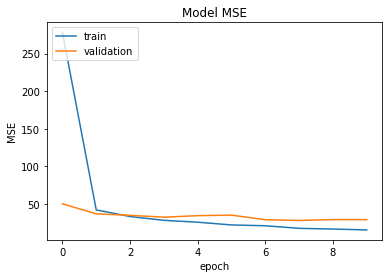

In [ ]:
plot_error(history)

## **K-Fold Cross Validation - MLP**

In [18]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [19]:
num_folds = 5
cv = KFold(n_splits=num_folds, random_state=1, shuffle=True)

In [ ]:
X = np.asarray(images)
X = X.flatten().reshape(X.shape[0],X.shape[1]*X.shape[2]*X.shape[3])
y = np.asarray(labels)

In [ ]:
fold_no = 1
for train, test in cv.split(X, y):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    model = tuner.hypermodel.build(best_hps)

    # Fit data to model
    history = model.fit(X[train], y[train],
              batch_size=32,
              epochs=5)
    fold_no += 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
575/575 [==============================] - 5s 7ms/step - loss: 744.8950 - mean_squared_error: 744.8950
Epoch 2/5
575/575 [==============================] - 4s 7ms/step - loss: 78.4364 - mean_squared_error: 78.4364
Epoch 3/5
575/575 [==============================] - 4s 7ms/step - loss: 62.4217 - mean_squared_error: 62.4217
Epoch 4/5
575/575 [==============================] - 4s 7ms/step - loss: 56.5616 - mean_squared_error: 56.5616
Epoch 5/5
575/575 [==============================] - 4s 7ms/step - loss: 51.9927 - mean_squared_error: 51.9927
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
575/575 [==============================] - 5s 7ms/step - loss: 771.1601 - mean_squared_error: 771.1601
Epoch 2/5
575/575 [==============================] - 4s 7ms/step - loss: 84.2223 - mean_squared_error: 84.2223
Epoch 3/5
575/575 [======

## **CNN - Hyperparameter Search**

In [24]:
X_train, y_train, X_val, y_val, X_test, y_test  = split_data(X,y)

tuner2.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner2.get_best_hyperparameters(num_trials=1)[0]

# print(f"""
# The hyperparameter search is complete. The optimal number of units in the first densely-connected
# layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
# is {best_hps.get('learning_rate')}.
# """)

Trial 30 Complete [00h 01m 23s]
mean_squared_error: 28.024879455566406

Best mean_squared_error So Far: 28.024879455566406
Total elapsed time: 00h 10m 55s
INFO:tensorflow:Oracle triggered exit


ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



KeyError: ignored

In [25]:
tuner2.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name='mean_squared_error', direction='min')
Trial summary
Hyperparameters:
conv_1_filter: 112
conv_1_kernel: 5
conv_2_filter: 48
conv_2_kernel: 5
dense_1_units: 48
learning_rate: 0.001
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 28.024879455566406
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
conv_2_filter: 64
conv_2_kernel: 5
dense_1_units: 64
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 28.921207427978516
Trial summary
Hyperparameters:
conv_1_filter: 128
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 5
dense_1_units: 48
learning_rate: 0.01
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 2
tuner/round: 2
tuner/trial_id: 3a3831ef69d9c66e9e2f04407c4cd450
Score: 30.27772331237793
Trial summary
Hyperparameters:
conv_1_filter: 80
conv_1_kernel: 5
conv_2_filter: 32
conv_2_kernel: 5
dense_1_units:

## **Define best CNN model**

In [15]:
model = keras.Sequential([
keras.layers.Conv2D(
    filters=112,
    kernel_size=5,
    activation='relu',
    input_shape=(9,32,32)
),
keras.layers.Conv2D(
    filters=48,
    kernel_size=5,
    activation='relu'
),
keras.layers.Flatten(),
keras.layers.Dense(
    units=48,
    activation='relu'
),
keras.layers.Dense(1, kernel_initializer='normal')
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),loss='mean_squared_error',metrics=['mean_squared_error'])


In [27]:
# model = tuner2.hypermodel.build(best_hps)
X_train, y_train, X_val, y_val, X_test, y_test  = split_data(X,y)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

val_mse_per_epoch = history.history['val_mean_squared_error']
best_epoch = val_mse_per_epoch.index(min(val_mse_per_epoch)) + 1
print('Best epoch: %d' % (best_epoch,))

Epoch 1/10
431/431 [==============================] - 35s 11ms/step - loss: 111.8309 - mean_squared_error: 111.8309 - val_loss: 52.9184 - val_mean_squared_error: 52.9184
Epoch 2/10
431/431 [==============================] - 4s 9ms/step - loss: 52.7150 - mean_squared_error: 52.7150 - val_loss: 54.4563 - val_mean_squared_error: 54.4563
Epoch 3/10
431/431 [==============================] - 4s 9ms/step - loss: 44.3685 - mean_squared_error: 44.3685 - val_loss: 47.7826 - val_mean_squared_error: 47.7826
Epoch 4/10
431/431 [==============================] - 4s 10ms/step - loss: 41.1019 - mean_squared_error: 41.1019 - val_loss: 44.0009 - val_mean_squared_error: 44.0009
Epoch 5/10
431/431 [==============================] - 4s 9ms/step - loss: 38.8694 - mean_squared_error: 38.8694 - val_loss: 42.9141 - val_mean_squared_error: 42.9141
Epoch 6/10
431/431 [==============================] - 4s 9ms/step - loss: 36.2576 - mean_squared_error: 36.2576 - val_loss: 42.8585 - val_mean_squared_error: 42.8585

In [28]:
predictions = model.predict(X_test)
metrics(predictions,y_test)

MSE: [31.926891]
RMSE:[5.6503887]
MAE: [4.341954]
NRMSE: [0.06924496]


dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


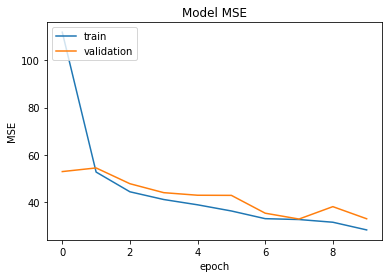

In [29]:
plot_error(history)

## **K-Fold Cross Validation - CNN**

In [16]:
X = np.asarray(images)
y = np.asarray(labels)

In [20]:
fold_no = 1

for train, test in cv.split(X, y):
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    # Fit data to model
    history = model.fit(X[train], y[train],
              batch_size=32,
              epochs=5)
    fold_no += 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
575/575 [==============================] - 35s 9ms/step - loss: 98.6171 - mean_squared_error: 98.6171
Epoch 2/5
575/575 [==============================] - 4s 8ms/step - loss: 49.9329 - mean_squared_error: 49.9329
Epoch 3/5
575/575 [==============================] - 4s 8ms/step - loss: 42.8877 - mean_squared_error: 42.8877
Epoch 4/5
575/575 [==============================] - 4s 8ms/step - loss: 39.1949 - mean_squared_error: 39.1949
Epoch 5/5
575/575 [==============================] - 4s 8ms/step - loss: 35.6123 - mean_squared_error: 35.6123
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
575/575 [==============================] - 5s 9ms/step - loss: 33.9257 - mean_squared_error: 33.9257
Epoch 2/5
575/575 [==============================] - 5s 8ms/step - loss: 31.1259 - mean_squared_error: 31.1259
Epoch 3/5
575/575 [=========